June 2nd, 2025

## Reduced QLT hot + cold electron whistler compared with [Roytershteyn and Delzanno PoP 2021](https://pubs.aip.org/aip/pop/article-abstract/28/4/042903/263604/Nonlinear-coupling-of-whistler-waves-to-oblique?redirectedFrom=fulltext)

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [4]:
def Z(xi):
    # plasma dispersion function
    return 1j * np.sqrt(np.pi) * wofz(xi)

def xi_1(z, q, beta_par, M=1, ions=False):
    # phase velocity (with cycltron frequency)
    if ions: 
        return (M*z+1)/(np.abs(q)*np.sqrt(beta_par)*np.sqrt(M))
    else:
        return (z-1)/(np.abs(q)*np.sqrt(beta_par))

def xi_0(z, q, beta_par, M=1):
    # phase velocity 
    return z/(np.abs(q)*np.sqrt(beta_par)*np.sqrt(M))

def eta(z, A, q, beta_par):
    # non-dimensional number
    return (z*(A+1) - A)/(np.abs(q) * np.sqrt(beta_par))

### QLT equations
\begin{align*}
    \frac{\mathrm{d}\beta^{r}_{\perp c}}{\mathrm{d} \tau} &= -2 \sqrt{\pi} \int_{0}^{\infty}\frac{\mathcal{E}(q, \tau)}{q^2} \mathrm{Re}\{\xi_{c}^{1}\} \exp(-\mathrm{Re}\{\xi_{c}^{1}\}^2)\left((\mathrm{Re}\{z\} -1)A_{c} + \mathrm{Re}\{z\} \right)\mathrm{d}q,\\
    \frac{\mathrm{d}\beta^{r}_{\| c}}{\mathrm{d} \tau} &=  4\sqrt{\pi} \int_{0}^{\infty}\frac{\mathcal{E}(q, \tau)}{q^2} \mathrm{Re}\{\xi_{c}^{0} + \xi_{c}^{1}\} \exp(-\mathrm{Re}\{\xi_{c}^{1}\}^2)\left((\mathrm{Re}\{z\} -1)A_{c} + \mathrm{Re}\{z\} \right)\mathrm{d}q,\\
    \frac{\mathrm{d}\beta^{r}_{\perp h}}{\mathrm{d} \tau} &= -2 \sqrt{\pi} \int_{0}^{\infty}\frac{\mathcal{E}(q, \tau)}{q^2} \mathrm{Re}\{\xi_{h}^{1}\} \exp(-\mathrm{Re}\{\xi_{h}^{1}\}^2)\left((\mathrm{Re}\{z\} -1)A_{h} + \mathrm{Re}\{z\} \right)\mathrm{d}q,\\
    \frac{\mathrm{d}\beta^{r}_{\| h}}{\mathrm{d} \tau} &=  4\sqrt{\pi} \int_{0}^{\infty}\frac{\mathcal{E}(q, \tau)}{q^2} \mathrm{Re}\{\xi_{h}^{0} + \xi_{h}^{1}\} \exp(-\mathrm{Re}\{\xi_{h}^{1}\}^2)\left((\mathrm{Re}\{z\} -1)A_{h} + \mathrm{Re}\{z\} \right)\mathrm{d}q,\\
    \partial_{\tau} \mathcal{E}(q, \tau) &= 2 \mathrm{Im}\{z\} \mathcal{E}(q, \tau),
\end{align*}

The dispersion relation reads as 
\begin{equation*}
    q^{2} - \xi_{i}^{0}Z(\xi_{i}^{1})- \left(1-\delta\right)\left(A_{c} + \eta_{c} Z(\xi_{c}^{1}\right) )- \delta \left(A_{h} + \eta_{h} Z(\xi_{h}^{1})\right) = 0, \qquad \mathrm{with} \qquad \eta_{s} \coloneqq \frac{(A_{s} + 1) z - A_{s}}{q \sqrt{\beta_{\|s}}}, \qquad \delta \coloneqq \frac{n_{h}}{n_{0}}, \qquad \xi_{s}^{1} = \frac{z-1}{|q|\sqrt{\beta_{\|s}}}.
\end{equation*}

 ------ Reference parameters  ------ 
 
Path to the simulation data ../:

Lx=0.00441942, Ly=0.00413367, Lz=62.8319

nx=1, ny=1, nz=15200

dx=0.00441942, dy=0.00413367, dz=0.00413367

dt*wpe=0.004051

mi/me=1836

Reference wpe/wce (hot density) = 4

vthe/c=0.00441942

 ------ Summary of Loaded initial condition (average values) ------ 
 
Bz0/B0 = 1

nec/neH = 3.99881

nec/ni  = 0.799952

ni/neH  = 4.99881

ni/(neC+neH) = 1

wpe/wce with ion (total) density = 4

wpe/wce with hot density = 1.78907

 ------ Parameters of the cold electrons (average values) ------ 
 
fraction of total density  = 0.799952

parallel beta              = 0.000499965

perp.    beta              = 0.000499965

T_per/T_par                = 0.999999

 ------ Parameters of the hot electrons (average values) ------ 
 
fraction of total density  = 0.200048

parallel beta              = 0.0256747

perp.    beta              = 0.130648

T_per/T_par                = 5.08858


------ Parameters of the ions (average values) ------ 

parallel beta              = 0.000624881

perp.    beta              = 0.000624949

T_per/T_par                = 1.00011



In [5]:
# # dispersion relation 
# delta =  0.2 # ratio of hot electron population
# B0 = 0.25

# # hot 
# beta_par_h_init = 0.025/delta # initial beta parallel 
# A_h_init = 4 # 4 # initial anisotropic level

# # cold
# beta_par_c_init = beta_par_h_init/200 # beta_par_h_init/200 # initial beta parallel 
# A_c_init = 0. # initial anisotropic level 

# # ions 
# beta_par_i_init = beta_par_c_init
# q_vec = np.linspace(0.7, 1.8, 100) # vector with all normalized wavenumber

In [6]:
0.1283732748302435/200

0.0006418663741512174

In [7]:
(0.000499965)/(1-delta)

NameError: name 'delta' is not defined

In [ ]:
# # Low-anisotropy case
# # with cold electrons nc/n0 != 0 
# delta =  0.2 # ratio of hot electron population
# B0 = 0.25

# # hot 
# beta_par_h_init = 0.1283732748302435 # initial beta parallel 
# A_h_init = 2 # initial anisotropic level

# # cold
# beta_par_c_init = beta_par_h_init/2000/(1-delta) # initial beta parallel 
# A_c_init = 0. # initial anisotropic level 

# # ions 
# beta_par_i_init = beta_par_c_init*(1-delta)
# q_vec = np.linspace(0.7, 2, 50) # vector with all normalized wavenumber

In [12]:
# High-anisotropy case
# with cold electrons nc/n0 != 0 
delta =  0.2 # ratio of hot electron population
B0 = 0.25

# hot 
beta_par_h_init = 0.1283732748302435 #0.025000029614592002/delta # initial beta parallel 
A_h_init = 4.08858 # 4 # initial anisotropic level

# cold
beta_par_c_init = (0.000499965)/(1-delta) # beta_par_h_init/2000 # initial beta parallel 
A_c_init = 0. # initial anisotropic level 

# ions 
beta_par_i_init = 0.000624881
q_vec = np.linspace(0.7, 2, 50) # vector with all normalized wavenumber

In [13]:
t_max = 500

beta_perp_c_init =  (A_c_init + 1) * beta_par_c_init  # initial beta perpendicular 
beta_perp_h_init =  (A_h_init + 1) * beta_par_h_init  # initial beta perpendicular 

dB_init = 1e-8 * np.ones(len(q_vec)) # initial wave energy density noise level

In [14]:
# dispersion relation 
def dispersion_relation(q, 
                        beta_par_c,
                        beta_par_h, 
                        beta_par_i,
                        A_c,
                        A_h, 
                        delta, 
                        M=1836):
    return lambda z: q**2 - xi_0(z=z, q=q, beta_par=beta_par_i, M=M)*Z(xi=xi_1(z=z, q=q, beta_par=beta_par_i, M=M))\
                           - (1-delta)*(A_c + eta(z, A=A_c, q=q, beta_par=beta_par_c)*Z(xi=xi_1(z, q=q, beta_par=beta_par_c)))\
                           - delta *(A_h + eta(z, A=A_h, q=q, beta_par=beta_par_h)*Z(xi=xi_1(z, q=q, beta_par=beta_par_h)))
    

In [15]:
def get_z_vec(q_vec, A_h, A_c, beta_par_c, beta_par_h, beta_par_i, delta):
    z_vec = np.zeros(len(q_vec), dtype="complex128")
    for ii, q in enumerate(q_vec):
        if q < 1.5:
            ic1 = 0.55+ 1e-4j
            ic2 = 0.8+ 1e-4j
        else:
            ic1 = 0.65+ 1e-4j
            ic2 = 0.8+ 1e-4j
        try:
            z_vec[ii] = scipy.optimize.newton(dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta), ic1, tol=1e-15)
            if dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta)(z_vec[ii]) > 1e-10:
                print("q1=", q)
                print("residual1=", np.abs(dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta)(z_vec[ii])))
        except:
            z_vec[ii] = scipy.optimize.newton(dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta), ic2, tol=1e-15)
            if dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta)(z_vec[ii]) > 1e-10:
                print("q3=", q)
                print("residual3=", np.abs(dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta)(z_vec[ii])))
    return z_vec

In [16]:
sol_ = get_z_vec(q_vec=q_vec, A_c=A_c_init, beta_par_c=beta_par_c_init, beta_par_i=beta_par_i_init, A_h=A_h_init, beta_par_h=beta_par_h_init, delta=delta)

In [17]:
data = np.zeros((100, 3))
with open("../data/1D-analog-of-2D-long/disp.dat", "r") as file:
        ii = 0 
        for line in file:
            # Process each line
            s = line.strip().split(",")[0]
            data[ii, :] = np.array(s.split(), dtype=float)
            ii+=1

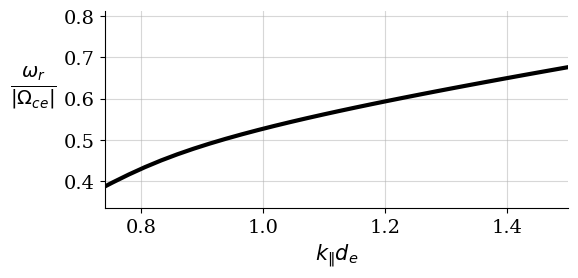

In [18]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(q_vec, sol_.real, linewidth=3, color="black")
ax.set_ylabel(r'$\frac{\omega_{r}}{|\Omega_{ce}|}$', labelpad=22, rotation=0, fontsize=20)
ax.set_xlabel('$k_{\|}d_{e}$', fontsize=15)
ax.set_xlim(0.74, 1.5)
#ax.set_ylim(0, 0.021)
# ax.set_yticks([0, 0.01, 0.02])
# ax.set_yticklabels([0, 0.01, 0.02])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figs/vadim_2021/vadim_fig5_f.png", dpi=300, bbox_inches='tight')

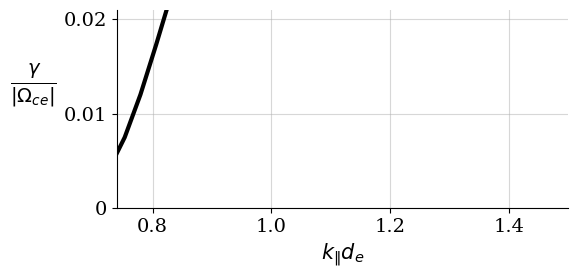

In [19]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(q_vec, sol_.imag, linewidth=3, color="black")
ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', labelpad=22, rotation=0, fontsize=20)
ax.set_xlabel('$k_{\|}d_{e}$', fontsize=15)
ax.set_xlim(0.74, 1.5)
ax.set_ylim(0, 0.021)
ax.set_yticks([0, 0.01, 0.02])
ax.set_yticklabels([0, 0.01, 0.02])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figs/vadim_2021/vadim_fig5_e.png", dpi=300, bbox_inches='tight')

\begin{align*}
    \frac{\mathrm{d}\beta^{r}_{\perp c}}{\mathrm{d} \tau} &= -2 \sqrt{\pi} \int_{0}^{\infty}\frac{\mathcal{E}(q, \tau)}{q^2} \mathrm{Re}\{\xi_{c}^{1}\} \exp(-\mathrm{Re}\{\xi_{c}^{1}\}^2)\left((\mathrm{Re}\{z\} -1)A_{c} + \mathrm{Re}\{z\} \right)\mathrm{d}q,\\
    \frac{\mathrm{d}\beta^{r}_{\| c}}{\mathrm{d} \tau} &=  4\sqrt{\pi} \int_{0}^{\infty}\frac{\mathcal{E}(q, \tau)}{q^2} \mathrm{Re}\{\xi_{c}^{0} + \xi_{c}^{1}\} \exp(-\mathrm{Re}\{\xi_{c}^{1}\}^2)\left((\mathrm{Re}\{z\} -1)A_{c} + \mathrm{Re}\{z\} \right)\mathrm{d}q,\\
    \frac{\mathrm{d}\beta^{r}_{\perp h}}{\mathrm{d} \tau} &= -2 \sqrt{\pi} \int_{0}^{\infty}\frac{\mathcal{E}(q, \tau)}{q^2} \mathrm{Re}\{\xi_{h}^{1}\} \exp(-\mathrm{Re}\{\xi_{h}^{1}\}^2)\left((\mathrm{Re}\{z\} -1)A_{h} + \mathrm{Re}\{z\} \right)\mathrm{d}q,\\
    \frac{\mathrm{d}\beta^{r}_{\| h}}{\mathrm{d} \tau} &=  4\sqrt{\pi} \int_{0}^{\infty}\frac{\mathcal{E}(q, \tau)}{q^2} \mathrm{Re}\{\xi_{h}^{0} + \xi_{h}^{1}\} \exp(-\mathrm{Re}\{\xi_{h}^{1}\}^2)\left((\mathrm{Re}\{z\} -1)A_{h} + \mathrm{Re}\{z\} \right)\mathrm{d}q,\\
    \partial_{\tau} \mathcal{E}(q, \tau) &= 2 \mathrm{Im}\{z\} \mathcal{E}(q, \tau),
\end{align*}

In [20]:
def dB_dt(gamma, B_vec):
    return 2*gamma*B_vec

In [21]:
def dbetaperp_dt(A, q_vec, B_vec, z_vec, dq, beta_par):
    # Eq. (2) rhs
    rhs = np.zeros(len(q_vec)) 
    for ii in range(len(q_vec)):
        # phase velocity normalized 
        xi_1_e = xi_1(z=z_vec[ii], q=q_vec[ii], beta_par=beta_par) 
        xi_0_e = xi_0(z=z_vec[ii], q=q_vec[ii], beta_par=beta_par) 
        # rhs 
        rhs[ii] = (B_vec[ii] / (q_vec[ii]**2)) * (xi_0_e.real - xi_1_e.real) * np.exp(-(xi_1_e.real)**2) * ((z_vec[ii].real - 1)*A + z_vec[ii].real)
    return 2 *np.sqrt(np.pi) * np.sum((rhs[:-1] + rhs[1:]) * 0.5 * dq) # trapezoidal rule

In [22]:
def dbetapar_dt(A, q_vec, B_vec, z_vec, dq, beta_par):
    # Eq. (3) rhs
    rhs =  np.zeros(len(q_vec))  
    for ii in range(len(q_vec)):
        # phase velocity normalized 
        xi_1_e = xi_1(z=z_vec[ii], q=q_vec[ii], beta_par=beta_par) 
        xi_0_e = xi_0(z=z_vec[ii], q=q_vec[ii], beta_par=beta_par) 
        # rhs 
        rhs[ii] = (B_vec[ii] / (q_vec[ii]**2)) * (xi_1_e.real) * np.exp(-(xi_1_e.real)**2) * ((z_vec[ii].real - 1)*A + z_vec[ii].real)
    return  4 * np.sqrt(np.pi) * np.sum((rhs[:-1] + rhs[1:]) * 0.5 * dq) # trapezoidal rule

In [23]:
def dydt(t, f, q_vec, delta, beta_par_i):
    A_c = f[0]/f[1]-1
    A_h = f[2]/f[3]-1
    # dispersion solver
    z_vec = get_z_vec(q_vec, A_c=A_c, beta_par_c=f[1], A_h=A_h, beta_par_h=f[3], delta=delta, beta_par_i=beta_par_i)

    # cold 
    # beta perpendicular 
    rhs_beta_perp_c = dbetaperp_dt(A=A_c, q_vec=q_vec, B_vec=f[4:], z_vec=z_vec, dq=q_vec[1]-q_vec[0], beta_par=f[1])
    # beta parallel
    rhs_beta_par_c =  dbetapar_dt(A=A_c,  q_vec=q_vec, B_vec=f[4:], z_vec=z_vec, dq=q_vec[1]-q_vec[0], beta_par=f[1])

    # hot 
    # beta perpendicular 
    rhs_beta_perp_h = dbetaperp_dt(A=A_h, q_vec=q_vec, B_vec=f[4:], z_vec=z_vec, dq=q_vec[1]-q_vec[0], beta_par=f[3])
    # beta parallel
    rhs_beta_par_h =  dbetapar_dt(A=A_h,  q_vec=q_vec, B_vec=f[4:], z_vec=z_vec, dq=q_vec[1]-q_vec[0], beta_par=f[3])

    
    # magnetic energy 
    rhs_B = dB_dt(gamma=z_vec.imag, B_vec=f[4:])
    print("time = ", t)
    
    return np.concatenate(([rhs_beta_perp_c], [rhs_beta_par_c], [rhs_beta_perp_h], [rhs_beta_par_h], rhs_B))

In [24]:
result = scipy.integrate.solve_ivp(fun=dydt, 
                                   t_span=[0, t_max], 
                                   y0=np.concatenate(([beta_perp_c_init], [beta_par_c_init], [beta_perp_h_init], [beta_par_h_init], dB_init)), 
                                   args=(q_vec, delta, beta_par_i_init),
                                   atol=1e-8, rtol=1e-8, method='BDF')

time =  0.0
time =  239975.7581915793
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.0
time =  0.20709339139636143
time =  0.20709339139636143
time =  0.41418678279272286
time =  0.41418678279272286
time =  2.4851206967563373
time =  2.4851206967563373
time =  4.5560546107199515
time =  4.5560546107199515
time =  14.38056926881563
time =  14.38056926881563
time =  24.20508392691131
time

In [25]:
# Vadim PIC solution 
# nc = 0
t_PIC = np.load("../data/1D-analog-of-2D-long/spectrum_in_time/t_vadim_PoP_2021.npy")

pzz_eC = np.load("../data/1D-analog-of-2D-long/spectrum_in_time/pzz_eC_vadim_PoP_2021.npy")
pxx_eC = np.load("../data/1D-analog-of-2D-long/spectrum_in_time/pxx_eC_vadim_PoP_2021.npy")
pyy_eC = np.load("../data/1D-analog-of-2D-long/spectrum_in_time/pyy_eC_vadim_PoP_2021.npy")


betaC_par = (2*pzz_eC/(B0**2))/(1-delta)
betaC_perp = ((pxx_eC+pyy_eC)/(B0**2))/(1-delta)

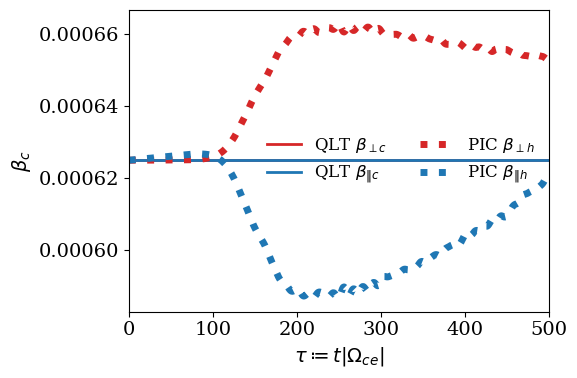

In [26]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(result.t, result.y[0], ls="-", color="tab:red", label=r"QLT $\beta_{\perp c}$", linewidth=2)
ax.plot(result.t, result.y[1], ls="-", color="tab:blue", label=r"QLT $\beta_{\| c}$", linewidth=2)


ax.plot(t_PIC, betaC_perp, ls=":", color="tab:red", label=r"PIC $\beta_{\perp h}$", linewidth=5)
ax.plot(t_PIC, betaC_par, ls=":", color="tab:blue", label=r"PIC $\beta_{\| h}$", linewidth=5)

ax.set_xlabel(r'$\tau \coloneq t|\Omega_{ce}|$')
ax.set_ylabel(r'$\beta_{c}$')

ax.set_xlim(0, t_max)
legend = ax.legend(loc='center right', ncols=2, fancybox=False, shadow=False, fontsize=12)
legend.get_frame().set_alpha(0)

plt.tight_layout()
plt.savefig("../figs/vadim_2021/vadim_2021_cold_beta_res.png", dpi=300, bbox_inches='tight')

In [27]:
# Vadim PIC solution 
pzz_eH = np.load("../data/1D-analog-of-2D-long/spectrum_in_time/pzz_eH_vadim_PoP_2021.npy")
pxx_eH = np.load("../data/1D-analog-of-2D-long/spectrum_in_time/pxx_eH_vadim_PoP_2021.npy")
pyy_eH = np.load("../data/1D-analog-of-2D-long/spectrum_in_time/pyy_eH_vadim_PoP_2021.npy")

betaH_par = 2*pzz_eH/(B0**2)/(delta)
betaH_perp = (pxx_eH+pyy_eH)/(B0**2)/(delta)

In [28]:
betaH_perp[0]

0.6532375604906854

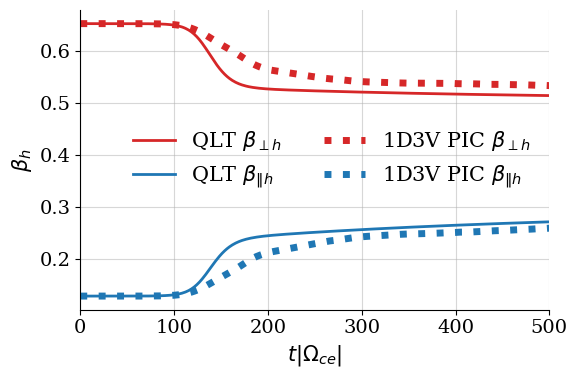

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(result.t, result.y[2], ls="-", color="tab:red", label=r"QLT $\beta_{\perp h}$", linewidth=2)
ax.plot(result.t, result.y[3], ls="-", color="tab:blue", label=r"QLT $\beta_{\| h}$", linewidth=2)

ax.plot(t_PIC, betaH_perp, ls=":", color="tab:red", label=r"1D3V PIC $\beta_{\perp h}$", linewidth=5)
ax.plot(t_PIC, betaH_par, ls=":", color="tab:blue", label=r"1D3V PIC $\beta_{\| h}$", linewidth=5)
ax.set_xlim(0, t_max)

ax.set_xlabel(r'$t|\Omega_{ce}|$', fontsize=15)
ax.set_ylabel(r'$\beta_{h}$', fontsize=15)

legend = ax.legend(loc='center right', ncols=2, fancybox=False, shadow=False, fontsize=15)
legend.get_frame().set_alpha(0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figs/vadim_2021/vadim_2021_hot_beta_res.png", dpi=300, bbox_inches='tight')

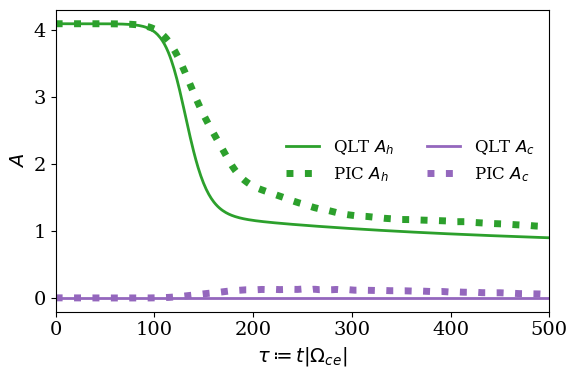

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(result.t, result.y[2]/result.y[3] -1, ls="-", color="tab:green", label=r"QLT $A_{h}$", linewidth=2)
ax.plot(t_PIC, betaH_perp/betaH_par -1, ls=":", color="tab:green", label=r"PIC $A_{h}$", linewidth=5)

ax.plot(result.t, result.y[0]/result.y[1] -1, ls="-", color="tab:purple", label=r"QLT $A_{c}$", linewidth=2)
ax.plot(t_PIC, betaC_perp/betaC_par -1, ls=":", color="tab:purple", label=r"PIC $A_{c}$", linewidth=5)

ax.set_xlim(0, t_max)

ax.set_xlabel(r'$\tau \coloneq t|\Omega_{ce}|$')
ax.set_ylabel(r'$A$')

legend = ax.legend(loc='center right', ncols=2, fancybox=False, shadow=False, fontsize=12)
legend.get_frame().set_alpha(0)


plt.tight_layout()
plt.savefig("../figs/vadim_2021/vadim_2021_A_res.png", dpi=300, bbox_inches='tight')

In [31]:
# Vadim PIC solution 
dB_PIC = np.load("../data/1D-analog-of-2D-long/spectrum_in_time/dB2_vadim_PoP_2021.npy")

In [32]:
dB_PIC[-1]

0.006048398061633764

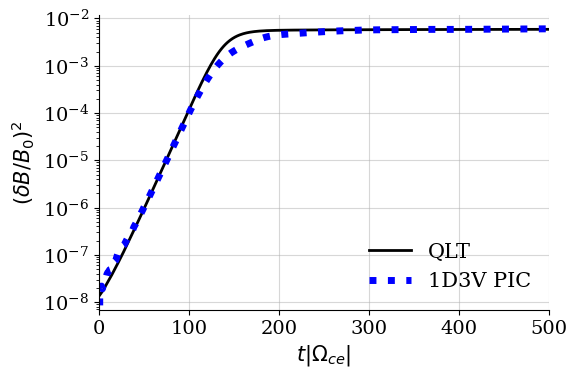

In [33]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(result.t, np.sum(result.y[4:, :], axis=0)*(q_vec[1]-q_vec[0]), color="black", linewidth=2, label="QLT")
ax.plot(t_PIC, dB_PIC, color="blue", linewidth=5, ls=":", label="1D3V PIC")

ax.set_yscale("log")

ax.set_xlabel(r'$t|\Omega_{ce}|$', fontsize=15)
ax.set_ylabel(r'$(\delta B/B_{0})^2$', fontsize=15)

ax.set_xlim(0, 500)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

legend = ax.legend(loc='lower right', ncols=1, fancybox=False, shadow=False, fontsize=15)
legend.get_frame().set_alpha(0)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figs/vadim_2021/vadim_2021_dB_linear_res.png", dpi=300, bbox_inches='tight')

Text(0.5, 1.0, '$\\mathcal{E}(q, \\tau)$')

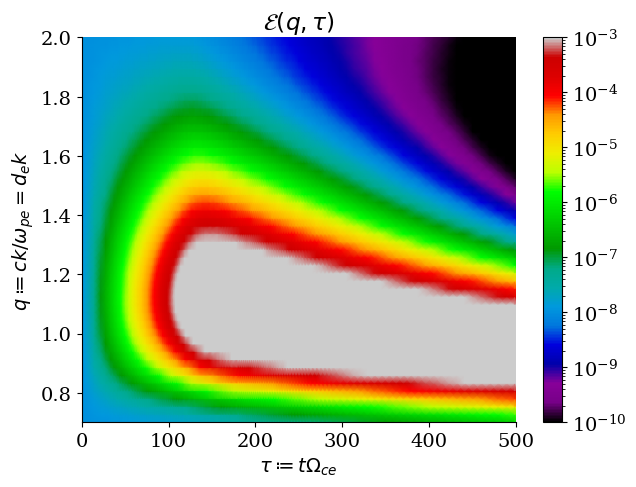

In [127]:
fig, ax = plt.subplots(figsize=(7, 5))
pos = ax.pcolormesh(result.t, q_vec, result.y[4:], cmap="nipy_spectral", norm=matplotlib.colors.LogNorm(vmin=1e-10, vmax=1e-3),shading='gouraud')
cbar = fig.colorbar(pos)

ax.set_xlabel(r'$\tau \coloneq t\Omega_{ce}$')
ax.set_ylabel(r'$q \coloneq ck/\omega_{pe}  = d_{e} k$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title(r"$\mathcal{E}(q, \tau)$")